Reading/Opening files

In [74]:
f = open("omni_test.lst")
line = f.readline()
line = f.readline()
line = f.readline()
print(line)

This is Line3



In [75]:
nLines = 3
for iLine in range(nLines):
    tmp = f.readline()
    print(tmp)

Year  Day  Hour  Minute  SYM-H

2013  75  0  0    -7

2013  75  0  1    -7



In [76]:
for line in f:
    print(line)

2013  75  0  2    -7

2013  75  0  3    -8

2013  75  0  4    -8

2013  75  0  5    -7

2013  75  0  6    -7

2013  75  0  7    -7

2013  75  0  8    -8

2013  75  0  9    -8



convert strings to numerical values --> splitting the string


In [77]:
#Example 1:

with open("omni_test.lst") as f:
    line = f.readline()
    tmp = line.split()
    print(tmp)



['This', 'is', 'line1']


In [78]:
#Example 2:
with open("omni_test.lst") as f:
    for line in f:
        tmp = line.split()
        print(tmp)


['This', 'is', 'line1']
['This', 'is', 'Line2']
['This', 'is', 'Line3']
['Year', 'Day', 'Hour', 'Minute', 'SYM-H']
['2013', '75', '0', '0', '-7']
['2013', '75', '0', '1', '-7']
['2013', '75', '0', '2', '-7']
['2013', '75', '0', '3', '-8']
['2013', '75', '0', '4', '-8']
['2013', '75', '0', '5', '-7']
['2013', '75', '0', '6', '-7']
['2013', '75', '0', '7', '-7']
['2013', '75', '0', '8', '-8']
['2013', '75', '0', '9', '-8']


In [79]:
with open("omni_test.lst") as f:
    year = []
    day = []
    hour = []
    minute = []
    symh = [] # define the empty lists for variables we want to extract
        
    # skip the 3 lines doing nothing
   
    nLines = 3
    
    for iLine in range(nLines):
        tmp = f.readline()
   
 # line 4: read in variables line and convert to variable names    
    
    header = f.readline()
    vars = header.split()    
 
 # read in data lines and convert to numerical values.  
    for line in f:
        tmp = line.split()
        year.append(int(tmp[0]))
        day.append(int(tmp[1]))
        hour.append(int(tmp[2]))
        minute.append(int(tmp[3]))
        symh.append(int(tmp[-1])) #add the numerical values to the string
    
print(year) #check

    

[2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013]


In [105]:
import numpy as np 
import datetime as dt 

def read_ascii_file(filename, index):
    """This function opens and reads an ascii file, storing it in a data dictionary"""
    
    with open(filename) as f:
        data_dictionary = {'time':[],
                           'year':[],
                           'day':[],
                           'hour':[],
                           'minute':[],
                           'symh':[]
                          }  #creating a dictionary for our data      
        for line in f:
            tmp = line.split()
            data_dictionary["year"].append(int(tmp[0]))
            data_dictionary["day"].append(int(tmp[1]))
            data_dictionary["hour"].append(int(tmp[2]))
            data_dictionary["minute"].append(int(tmp[3]))
            data_dictionary["symh"].append(int(tmp[index]))
            
            #create datetime in each line
            time0 = dt.datetime(int(tmp[0]),1,1,int(tmp[2]),int(tmp[3]),0) + dt.timedelta(days=int(tmp[1])-1)
            data_dictionary["time"].append(time0)
            
    #time = np.array(time)
    #year = np.array(year)
    #day = np.array(day)
    #hour = np.array(hour)
    #minute = np.array(minute)
    #symh = np.array(symh)
    
    return data_dictionary
   # return time, year, day, hour, minute, symh


In [109]:
#printing datetimes, making it pretty :-) 
filename = 'omni_min_case_2013.lst'
index = -1
data = read_ascii_file(filename, index)

for element in data['time']:
    print(element.isoformat())


2013-03-16T00:00:00
2013-03-16T00:01:00
2013-03-16T00:02:00
2013-03-16T00:03:00
2013-03-16T00:04:00
2013-03-16T00:05:00
2013-03-16T00:06:00
2013-03-16T00:07:00
2013-03-16T00:08:00
2013-03-16T00:09:00
2013-03-16T00:10:00
2013-03-16T00:11:00
2013-03-16T00:12:00
2013-03-16T00:13:00
2013-03-16T00:14:00
2013-03-16T00:15:00
2013-03-16T00:16:00
2013-03-16T00:17:00
2013-03-16T00:18:00
2013-03-16T00:19:00
2013-03-16T00:20:00
2013-03-16T00:21:00
2013-03-16T00:22:00
2013-03-16T00:23:00
2013-03-16T00:24:00
2013-03-16T00:25:00
2013-03-16T00:26:00
2013-03-16T00:27:00
2013-03-16T00:28:00
2013-03-16T00:29:00
2013-03-16T00:30:00
2013-03-16T00:31:00
2013-03-16T00:32:00
2013-03-16T00:33:00
2013-03-16T00:34:00
2013-03-16T00:35:00
2013-03-16T00:36:00
2013-03-16T00:37:00
2013-03-16T00:38:00
2013-03-16T00:39:00
2013-03-16T00:40:00
2013-03-16T00:41:00
2013-03-16T00:42:00
2013-03-16T00:43:00
2013-03-16T00:44:00
2013-03-16T00:45:00
2013-03-16T00:46:00
2013-03-16T00:47:00
2013-03-16T00:48:00
2013-03-16T00:49:00


1804
2668
[False False False ... False False False]


<function matplotlib.pyplot.show(close=None, block=None)>

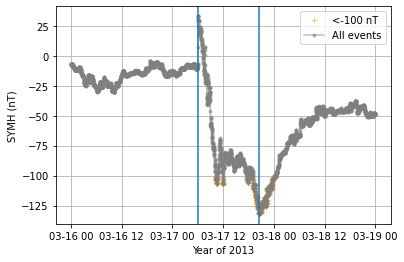

In [142]:
# plotting time versus our data, symh

import matplotlib.pyplot as plt 

time = np.array(data["time"])
symh = np.array(data["symh"])

fig,ax = plt.subplots()

max_data = np.argmax(symh)
min_data = np.argmin(symh)
#max_indices = np.where(symh == max_data)
#min_indices = np.where(symh == min_data)
#mintime = time[min_indices]
#maxtime = time[max_indices]
print(max_data)
print(min_data)


# add a operator on array, lp is a bool numpy array
lp = symh < -100
print(lp)

#pass lp to a subscript operator [], returning a new array containing elements in the operand
ax.plot(time[lp], symh[lp], marker ='+', 
        linestyle = '', 
        c = 'tab:orange',
        label = '<-100 nT',
        alpha = 0.6)


ax.plot(time, symh, marker ='.', c = 'gray', label = 'All events', alpha = 0.5)
ax.axvline(time[max_data]) #plotting vertical line at max of symh
ax.axvline(time[min_data]) #plotting vertical line at min of symh 
ax.set_xlabel('Year of 2013')
ax.set_ylabel('SYMH (nT)')
ax.grid(True)
ax.legend()
plt.show

In [87]:
# how to use datetime 

import datetime as dt

#datetime.datetime(year, month, day, hour = 0, minute = 0, second = 0)
#datetime.timedelta(days = 0, seconds = 0, microseconds = 0, milliseconds = 0, minutes = 0, hours = 0, weeks =0)

#create with year, month, day, hour, minute, second

time1 = dt.datetime(2013,1,3,10,12,30)

#create with year, day of year, hour, minute second

time2 = dt.datetime(2013,1,1,10,12,30) + dt.timedelta(days = 2)
print(time2.date())

Ip = time1 == time2 #output true
Ip = time1>dt.datetime(2013,1,5,0,0,0) #output False

2013-01-03


USING ARGPARSE


In [ ]:
import argparse

